<a href="https://colab.research.google.com/github/Pushpalatha-H/TechnoHacks_internship/blob/main/TechnoHacks_customer_chrun_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Chrun Prediction
**Use a dataset of customer information and
build a model that can predict which
customers are most likely to leave a company**

In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [133]:
print(df.to_string())


      Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes      Travel_Rarely       1102                   Sales                 1          2     Life Sciences              1               1                        2  Female          94               3         2            Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1        

In [134]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [135]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [136]:
def convert_to_binary(x):
  return 1 if x=='Yes' else 0


In [137]:
convert_to_binary("Yes")

1

In [138]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [139]:
df['Attrition'] =  df['Attrition'].apply(convert_to_binary)
df['OverTime'] =  df['OverTime'].apply(convert_to_binary)

In [140]:
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [141]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [142]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == 'Female' else 0)

In [143]:
df.dtypes

,0
Age,int64
Attrition,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [144]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [145]:
df['BusinessTravel'].apply(lambda x:0 if x == 'Travel_Rarely' else 1 if x == 'Travel_Frequently' else 2)

,BusinessTravel
0,0
1,1
2,0
3,1
4,0
...,...
1465,1
1466,0
1467,0
1468,1


In [146]:
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x : 0 if x == 'Travel_Rarely' else 1 if x == 'Travel_Frequently' else 2)

In [147]:
df['BusinessTravel'].unique()

array([0, 1, 2])

In [148]:
df.dtypes

,0
Age,int64
Attrition,int64
BusinessTravel,int64
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [149]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [150]:
df['Department'] = df['Department'].apply(lambda x : 0 if x == 'Sales' else 1 if x == 'Research & Development' else 2)

In [151]:
df['Department'].unique()

array([0, 1, 2])

In [152]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [154]:
dfle = df
dfle.EducationField = le.fit_transform(df['EducationField'])
dfle

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,0,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [155]:
dfle = df

In [156]:
df['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [157]:
df.dtypes

,0
Age,int64
Attrition,int64
BusinessTravel,int64
DailyRate,int64
Department,int64
DistanceFromHome,int64
Education,int64
EducationField,int64
EmployeeCount,int64
EmployeeNumber,int64


In [158]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [159]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [160]:
dfle = df
dfle.JobRole = le.fit_transform(df['JobRole'])
dfle

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,0,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [161]:
dfle = df

In [162]:
df['JobRole'].unique()

array([7, 6, 2, 4, 0, 3, 8, 5, 1])

In [163]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [164]:
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 0 if x=='Single' else 1 if x == 'Married' else 2)

In [165]:
df['MaritalStatus'].unique()

array([0, 1, 2])

In [166]:
df.dtypes

,0
Age,int64
Attrition,int64
BusinessTravel,int64
DailyRate,int64
Department,int64
DistanceFromHome,int64
Education,int64
EducationField,int64
EmployeeCount,int64
EmployeeNumber,int64


In [167]:
print(df.head().to_string())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41          1               0       1102           0                 1          2               1              1               1                        2       1          94               3         2        7                4              0           5993        19479                   8       1         1                 11                  3                         1             80                 0                  8                      0 

In [168]:
df['Chrun'] = df['Attrition']

In [169]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Chrun'],
      dtype='object')

In [170]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'RelationshipSatisfaction', 'StandardHours','StockOptionLevel' ], axis = 'columns', inplace = True)

In [171]:
print(df.head().to_string())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  Chrun
0   41          1               0       1102           0                 1          2               1                        2       1          94               3         2        7                4              0           5993        19479                   8         1                 11                  3                  8                      0                1               6                   4                        0                     5      1
1   49          0               1        279           1                 8        

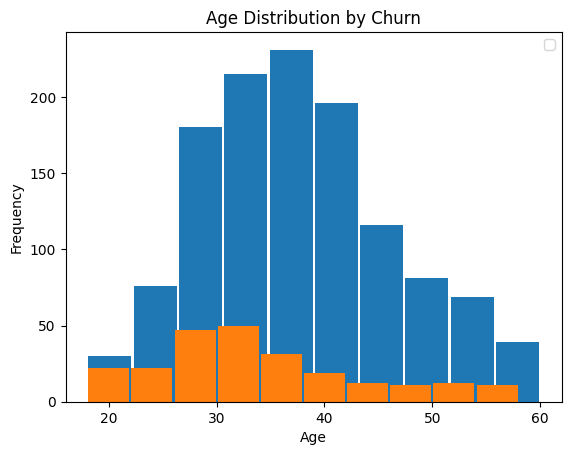

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

num_bins = 10

age_chrun_yes = df[df.Chrun == 1].Age
age_chrun_no = df[df.Chrun == 0].Age

plt.hist(age_chrun_no, bins = num_bins, rwidth = 0.95)
plt.hist(age_chrun_yes, bins = num_bins, rwidth = 0.95)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Age Distribution by Churn')
plt.show()

In [173]:
df.JobSatisfaction.unique()

array([4, 2, 3, 1])

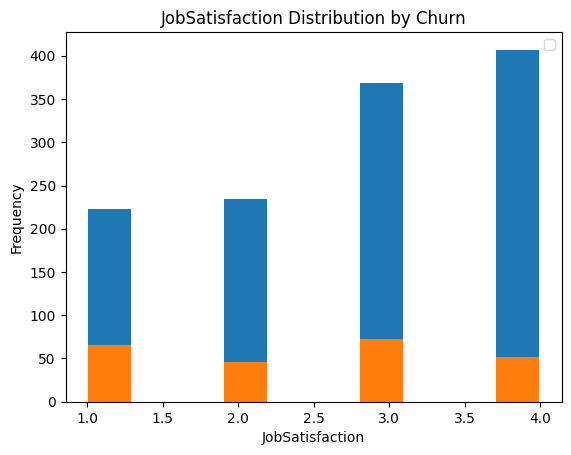

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

num_bins = 10

JobSatisfaction_chrun_yes = df[df.Chrun == 1].JobSatisfaction
JobSatisfaction_chrun_no = df[df.Chrun == 0].JobSatisfaction

plt.hist(JobSatisfaction_chrun_no, bins = num_bins, rwidth = 0.95)
plt.hist(JobSatisfaction_chrun_yes, bins = num_bins, rwidth = 0.95)

plt.xlabel('JobSatisfaction')
plt.ylabel('Frequency')
plt.legend()
plt.title('JobSatisfaction Distribution by Churn')
plt.show()

In [175]:
x = df.drop(['Chrun'], axis = 'columns')
y = df['Chrun']

In [176]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [177]:
len(x_train)

1102

In [178]:
len(x_test)

368

In [179]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [180]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
lr.score(x_test, y_test)

0.8532608695652174

In [182]:
y_pred =  lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [183]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       312
           1       0.67      0.07      0.13        56

    accuracy                           0.85       368
   macro avg       0.76      0.53      0.52       368
weighted avg       0.83      0.85      0.80       368



In [184]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[310,   2],
       [ 52,   4]], dtype=int32)>

<Axes: >

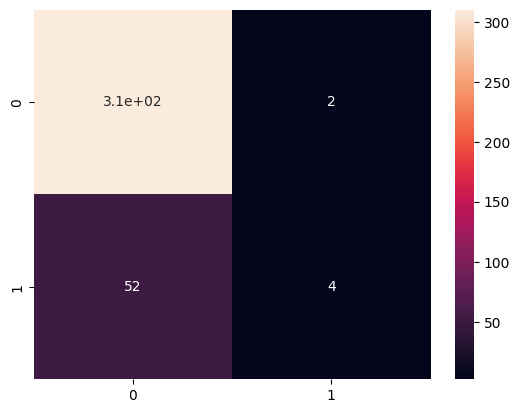

In [185]:
import seaborn as sn
sn.heatmap(cm, annot = True)